In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

c:\Users\crkpn\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\crkpn\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\crkpn\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
DF = pd.read_csv('./Pokemon.csv')

In [3]:
df = DF.copy()
print(df.shape)
df.head()

(800, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
df['Type 2'] = df['Type 2'].fillna('-')

In [6]:
df.isna().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [9]:
types = list(set(df["Type 1"]))
types+=['-']

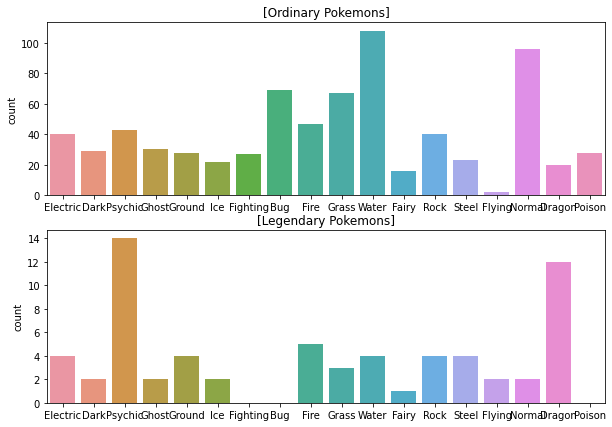

In [10]:
plt.figure(figsize=(10, 7))

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 1", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 1", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

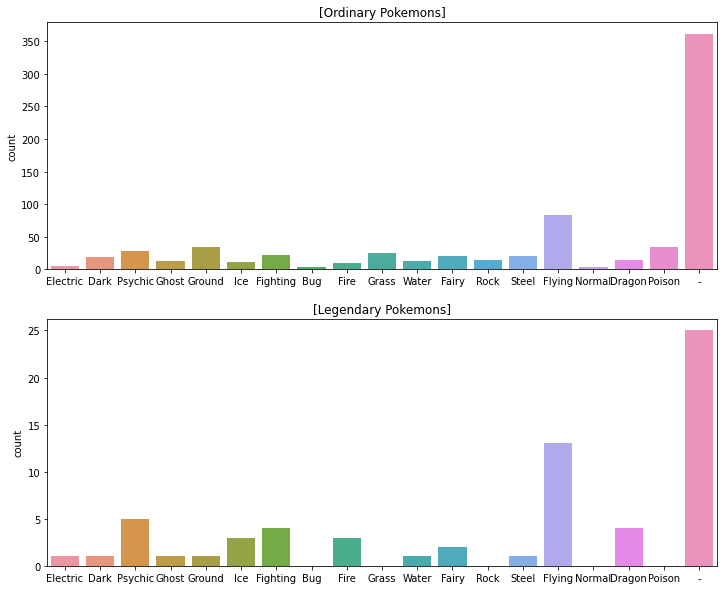

In [12]:
# Type2
plt.figure(figsize=(12, 10))  

plt.subplot(211)
sns.countplot(data=ordinary, x="Type 2", order=types).set_xlabel('')
plt.title("[Ordinary Pokemons]")

plt.subplot(212)
sns.countplot(data=legendary, x="Type 2", order=types).set_xlabel('')
plt.title("[Legendary Pokemons]")

plt.show()

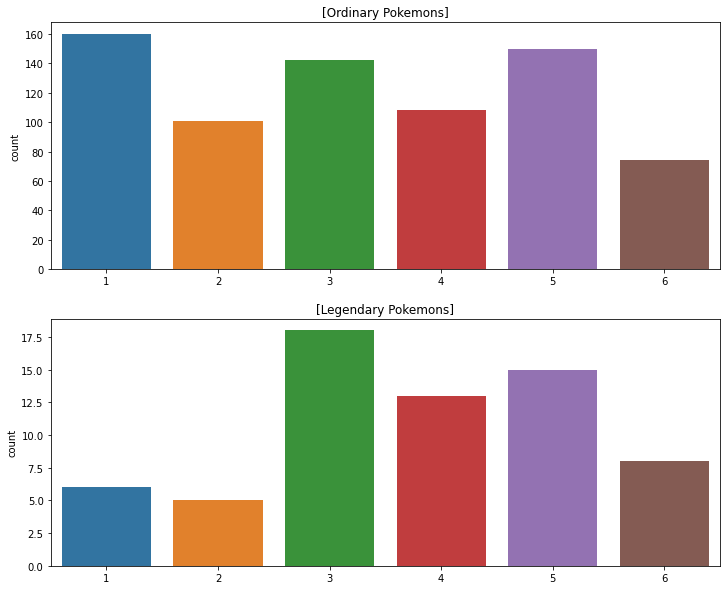

In [13]:
plt.figure(figsize=(12, 10)) 

plt.subplot(211)
sns.countplot(data=ordinary, x="Generation").set_xlabel('')
plt.title("[Ordinary Pokemons]")
plt.subplot(212)
sns.countplot(data=legendary, x="Generation").set_xlabel('')
plt.title("[Legendary Pokemons]")
plt.show()

In [14]:
df["Name_nospace"] = df["Name"].apply(lambda i: i.replace(" ", ""))
df["name_count"] = df["Name_nospace"].apply(lambda i: len(i))
df["long_name"] = df["name_count"] >= 10
df["name_isalpha"] = df["Name_nospace"].apply(lambda i: i.isalpha())

In [20]:
df = df.replace(to_replace="Nidoran♀", value="Nidoran X")
df = df.replace(to_replace="Nidoran♂", value="Nidoran Y")
df = df.replace(to_replace="Farfetch'd", value="Farfetchd")
df = df.replace(to_replace="Mr. Mime", value="Mr Mime")
df = df.replace(to_replace="Porygon2", value="Porygon")
df = df.replace(to_replace="Ho-oh", value="Ho Oh")
df = df.replace(to_replace="Mime Jr.", value="Mime Jr")
df = df.replace(to_replace="Porygon-Z", value="Porygon Z")
df = df.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

df.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_nospace,name_count,long_name,name_isalpha
34,29,Nidoran X,Poison,-,275,55,47,52,40,40,41,1,False,Nidoran X,8,False,False
37,32,Nidoran Y,Poison,-,273,46,57,40,40,40,50,1,False,Nidoran Y,8,False,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,Farfetchd,10,True,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,Mr.Mime,7,False,False
252,233,Porygon,Normal,-,515,85,80,90,105,95,60,2,False,Porygon,8,False,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,Ho Oh,5,False,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,MimeJr.,7,False,False
525,474,Porygon Z,Normal,-,535,85,80,70,135,75,90,4,False,Porygon Z,9,False,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,Zygarde50%Forme,15,True,False


In [22]:
df["Name_nospace"] = df["Name"].apply(lambda i: i.replace(" ", ""))
df["name_isalpha"] = df["Name_nospace"].apply(lambda i: i.isalpha())
df[df["name_isalpha"] == False]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_nospace,name_count,long_name,name_isalpha


In [26]:
encoder = LabelEncoder()

In [27]:
df['Type 1'] = encoder.fit_transform(df['Type 1'])

In [28]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_nospace,name_count,long_name,name_isalpha
0,1,Bulbasaur,9,Poison,318,45,49,49,65,65,45,1,False,Bulbasaur,9,False,True
1,2,Ivysaur,9,Poison,405,60,62,63,80,80,60,1,False,Ivysaur,7,False,True
2,3,Venusaur,9,Poison,525,80,82,83,100,100,80,1,False,Venusaur,8,False,True
3,3,VenusaurMega Venusaur,9,Poison,625,80,100,123,122,120,80,1,False,VenusaurMegaVenusaur,20,True,True
4,4,Charmander,6,-,309,39,52,43,60,50,65,1,False,Charmander,10,True,True
5,5,Charmeleon,6,-,405,58,64,58,80,65,80,1,False,Charmeleon,10,True,True
6,6,Charizard,6,Flying,534,78,84,78,109,85,100,1,False,Charizard,9,False,True
7,6,CharizardMega Charizard X,6,Dragon,634,78,130,111,130,85,100,1,False,CharizardMegaCharizardX,23,True,True
8,6,CharizardMega Charizard Y,6,Flying,634,78,104,78,159,115,100,1,False,CharizardMegaCharizardY,23,True,True
9,7,Squirtle,17,-,314,44,48,65,50,64,43,1,False,Squirtle,8,False,True


In [29]:
df['Type 2'] = encoder.fit_transform(df['Type 2'])

In [30]:
df.isna().sum()

#               0
Name            0
Type 1          0
Type 2          0
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
Name_nospace    0
name_count      0
long_name       0
name_isalpha    0
dtype: int64

In [31]:
df.loc[[8,9]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_nospace,name_count,long_name,name_isalpha
8,6,CharizardMega Charizard Y,6,8,634,78,104,78,159,115,100,1,False,CharizardMegaCharizardY,23,True,True
9,7,Squirtle,17,0,314,44,48,65,50,64,43,1,False,Squirtle,8,False,True


In [32]:
df.loc[[799]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Name_nospace,name_count,long_name,name_isalpha
799,721,Volcanion,6,18,600,80,110,120,130,90,70,6,True,Volcanion,9,False,True


In [33]:
df['Legendary'] = encoder.fit_transform(df['Legendary'])
df['long_name'] = encoder.fit_transform(df['long_name'])

In [34]:
X = df.drop(['#','Name','Name_nospace','name_isalpha','Legendary'],axis=1)

In [35]:
X

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,name_count,long_name
0,9,14,318,45,49,49,65,65,45,1,9,0
1,9,14,405,60,62,63,80,80,60,1,7,0
2,9,14,525,80,82,83,100,100,80,1,8,0
3,9,14,625,80,100,123,122,120,80,1,20,1
4,6,0,309,39,52,43,60,50,65,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...
795,15,5,600,50,100,150,100,150,50,6,7,0
796,15,5,700,50,160,110,160,110,110,6,18,1
797,14,9,600,80,110,60,150,130,70,6,18,1
798,14,2,680,80,160,60,170,130,80,6,17,1


In [36]:
Y = df['Legendary']

In [37]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
795    1
796    1
797    1
798    1
799    1
Name: Legendary, Length: 800, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 12) (640,)
(160, 12) (160,)


In [47]:
lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier()

In [48]:
lr.fit(X_train,y_train)
nb.fit(X_train,y_train)
knn.fit(X_train,y_train)
dt.fit(X_train,y_train)

c:\Users\crkpn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


DecisionTreeClassifier()

In [50]:
lr_pred = lr.predict(X_test)
nb_pred = nb.predict(X_test)
knn_pred = knn.predict(X_test)
dt_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

Logistic Regression

In [51]:
# Confusion Matrix
mat = confusion_matrix(y_test, lr_pred)
print(mat)
report = classification_report(y_test, lr_pred)
print(report)

[[146   1]
 [ 13   0]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       147
           1       0.00      0.00      0.00        13

    accuracy                           0.91       160
   macro avg       0.46      0.50      0.48       160
weighted avg       0.84      0.91      0.88       160



Naive Bayes

In [52]:
mat = confusion_matrix(y_test, nb_pred)
print(mat)
report = classification_report(y_test, nb_pred)
print(report)

[[134  13]
 [  2  11]]
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       147
           1       0.46      0.85      0.59        13

    accuracy                           0.91       160
   macro avg       0.72      0.88      0.77       160
weighted avg       0.94      0.91      0.92       160



KNN

In [53]:
mat = confusion_matrix(y_test, knn_pred)
print(mat)
report = classification_report(y_test, knn_pred)
print(report)

[[139   8]
 [  2  11]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       147
           1       0.58      0.85      0.69        13

    accuracy                           0.94       160
   macro avg       0.78      0.90      0.83       160
weighted avg       0.95      0.94      0.94       160



Decision Tree

In [54]:
mat = confusion_matrix(y_test, dt_pred)
print(mat)
report = classification_report(y_test, dt_pred)
print(report)

[[142   5]
 [  3  10]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       147
           1       0.67      0.77      0.71        13

    accuracy                           0.95       160
   macro avg       0.82      0.87      0.84       160
weighted avg       0.95      0.95      0.95       160

